# **Furniture Sales Prediction**<br><br>
| |Dibimbing.id|
|--|--|
|Author|Alief Muhammad Amanu|
|Batch|4|
|Project|Data Mining - Furniture Sales Prediction With Various Regression Models|

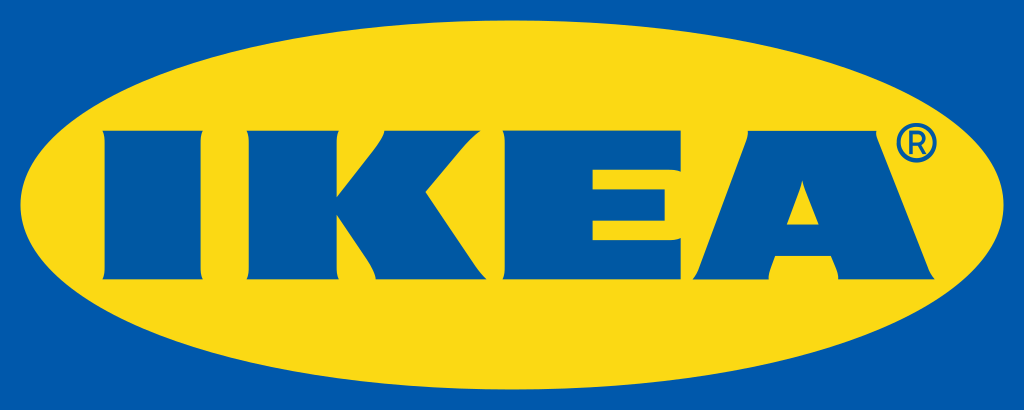

**What is IKEA?**

IKEA is a Swedish-origin Dutch (Netherlands)-headquartered multinational conglomerate that designs and sells ready-to-assemble furniture, kitchen appliances and home accessories, among other goods and home services. The group is known for its modernist designs for various types of appliances and furniture, and its interior design work is often associated with an eco-friendly simplicity.


**What is Regression?**

In statistical modeling, regression analysis is a set of statistical processes for **estimating the relationships** between a dependent variable (often called the 'outcome' or 'response' variable) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features'). Here are 5 regression models used in this analysis:
* Multiple Linear Regressor
* Random Forest Regressor
* XGBoost Regressor
* Lasso Regressor
* Ridge Regressor

**Regression for prediction, how?**

Using regression to make predictions doesn’t necessarily involve predicting the future. Instead, you predict the mean of the dependent variable given specific values of the independent variable(s).


# **Import Libraries**

In [1]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

# **Data Description**
This dataset contain 3600+ IKEA (Saudi Arabia) furniture sales scraped from IKEA website. The scraped website link: https://www.ikea.com/sa/en/cat/furniture-fu001/.

| Column | Interpretation |
|--|--|
|**Unnamed0**|unique data identifier|
|**item_id**|unique store item identifier for each product|
|**name**|commercial items name|
|**category**|type of furniture (sofa, bed, bar furniture, etc)|
|**price**|current item price in Saudi Riyals (SAR)|
|**old_price**|item price in Saudi Riyals (SAR) before discount|
|**sellabel_online**|unique identifier whether the furniture is available for online purchase or in-store only|
|**link**|website link for each item|
|**other_colors**|unique identifier whether the furniture has color option or not|
|**short_description**|a brief description about the furniture|
|**designer**|the name of designer who designed the item|
|**depth**|depth of the item in cm|
|**height**|height of the item in cm|
|**width**|width of the item in cm|


# **Load Dataset**

In [2]:
df_ikea = pd.read_csv("https://raw.githubusercontent.com/aliefamanu/project_stuff/main/mining_ikea.csv", sep = ',')
df_ikea

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0
3692,3692,89157573,ELVARLI,Wardrobes,2745.0,"SR 3,130",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 178x51x222-350 cm",Ehlén Johansson,50.0,NaN,178.0


# **Data Exploration and Preprocessing**

## Data Display and Description

In [3]:
# Display top 5 data rows
df_ikea.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [4]:
# Dataframe info
df_ikea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


-  missing value detected in several features.
-  `old_price` was an `object` where it supposed to be a `float64` or `int64` since it's a numerical feature, we might want to identify furthermore.
-  here i prefer to drop `Unnamed: 0`, `item_id`, `name`, `designer`, `link` and `short_description` since i feel these features are not important to this analysis.

In [5]:
df_ikea = df_ikea.drop(columns=['Unnamed: 0','item_id','link','short_description','name','designer'])

In [6]:
df_ikea

,category,price,old_price,sellable_online,other_colors,depth,height,width
0,Bar furniture,265.0,No old price,True,No,NaN,99.0,51.0
1,Bar furniture,995.0,No old price,False,No,NaN,105.0,80.0
2,Bar furniture,2095.0,No old price,False,No,NaN,NaN,NaN
3,Bar furniture,69.0,No old price,True,Yes,50.0,100.0,60.0
4,Bar furniture,225.0,No old price,True,No,60.0,43.0,74.0
...,...,...,...,...,...,...,...,...
3689,Wardrobes,750.0,SR 820,True,No,50.0,NaN,91.0
3690,Wardrobes,1572.0,"SR 1,755",True,No,50.0,NaN,135.0
3691,Wardrobes,924.0,"SR 1,050",True,No,50.0,NaN,175.0
3692,Wardrobes,2745.0,"SR 3,130",True,No,50.0,NaN,178.0


In [7]:
# Take a look for unique value in old_price
percentage_price = len(df_ikea[df_ikea['old_price']=='No old price'])/len(df_ikea['old_price'])*100
print(f'Percentage of No old price: {percentage_price:.2f}')

Percentage of No old price: 82.30


"No old price" is dominating the `old_price` by 82.30% from 3694 of total observations. Tho it's dominated by one value, I prefer not to drop this feature. Instead of dropping the feature, I would like to apply feature engineering to this feature. 

In [8]:
# Deleting SR chr in old_price and transform this feature into numeric
def fix_feature(df_ikea):
  '''cleaning and transform old_price feature'''

  if df_ikea['old_price'] == 'No old price':
    return df_ikea['price']

  elif df_ikea['old_price'][-4:] != 'pack':
    return float(str(df_ikea['old_price'])[3:].replace(',',''))
  
  else:
    return np.nan

df_ikea['is_disc'] = (df_ikea['old_price'] != 'No old price').astype(int)
df_ikea['old_price'] = df_ikea.apply(fix_feature, axis = 1)
df_ikea[['price','old_price','is_disc']].head()

,price,old_price,is_disc
0,265.0,265.0,0
1,995.0,995.0,0
2,2095.0,2095.0,0
3,69.0,69.0,0
4,225.0,225.0,0


In [9]:
df_ikea.sample(10)

,category,price,old_price,sellable_online,other_colors,depth,height,width,is_disc
1001,Cabinets & cupboards,2730.0,2730.0,True,Yes,NaN,211.0,300.0,0
2863,Tables & desks,695.0,695.0,True,No,NaN,105.0,70.0,0
1056,Cabinets & cupboards,210.0,210.0,True,No,NaN,64.0,60.0,0
1374,Chairs,95.0,95.0,True,No,50.0,45.0,52.0,0
1606,Chests of drawers & drawer units,49.0,49.0,True,No,34.0,56.0,30.0,0
1072,Cabinets & cupboards,17.0,17.0,True,No,18.0,NaN,24.0,0
2727,Tables & desks,475.0,475.0,True,No,NaN,48.0,NaN,0
2389,Sofas & armchairs,116.0,145.0,True,Yes,NaN,NaN,NaN,1
2102,Outdoor furniture,2412.0,2412.0,True,Yes,82.0,84.0,223.0,0
3290,TV & media furniture,345.0,345.0,True,No,36.0,85.0,120.0,0


In [10]:
# Basic statistical description for numerical features
df_ikea.describe()

,price,old_price,depth,height,width,is_disc
count,3694.000000,3684.000000,2231.000000,2706.000000,3105.000000,3694.000000
mean,1078.208419,1127.842291,54.379202,101.679970,104.470853,0.177044
std,1374.652494,1444.470030,29.958351,61.097585,71.133771,0.381757
min,3.000000,3.000000,1.000000,1.000000,1.000000,0.000000
25%,180.900000,195.000000,38.000000,67.000000,60.000000,0.000000
50%,544.700000,555.000000,47.000000,83.000000,80.000000,0.000000
75%,1429.500000,1495.000000,60.000000,124.000000,140.000000,0.000000
max,9585.000000,9985.000000,257.000000,700.000000,420.000000,1.000000


max value of `price` and `old_price` might be an indication of an outlier since it's max value is way higher with it's own min value and also any other features, statistical descriptive using graph will indicate more.

In [11]:
# Statistical description for categorical features
df_ikea.describe(include='object')

,category,other_colors
count,3694,3694
unique,17,2
top,Tables & desks,No
freq,612,2182


## Check Duplicated Data

In [12]:
df_ikea.duplicated().sum()

390

In [13]:
print(f'Data before duplication drop: {df_ikea.shape[0]}')

df_ikea = df_ikea.drop_duplicates().reset_index(drop=True)

print(f'Data after duplication drop: {df_ikea.shape[0]}')

Data before duplication drop: 3694
Data after duplication drop: 3304


In [14]:
df_ikea.duplicated().sum()

0

## Missing Value Analysis

In [15]:
n_missing = pd.DataFrame(df_ikea.isnull().sum().reset_index())
n_missing.columns=['Column_Name','Percentage_Missing']
n_missing['Percentage_Missing']=n_missing['Percentage_Missing'].apply(lambda x: x*100/df_ikea.shape[0])
n_missing.sort_values(by = ['Percentage_Missing'], ascending=False).loc[n_missing['Percentage_Missing']>0,:]

,Column_Name,Percentage_Missing
5,depth,36.410412
6,height,24.636804
7,width,13.831719
2,old_price,0.242131


From code above, we saw that there are several columns with missing values. Here are several columns with missing values:

*   **depth** : float64
*   **width** : float64
*   **height** : float64
*   **old_price**: float64

We can do some imputation to selected columns. For columns with dtype = `object`, we use **mode** for missing value imputation. For columns with dtype = `float64`, we use **median** for missing value imputation since **average** is not robust to outliers or spike value.

## Correlation Analysis

In [16]:
from IPython.display import HTML, display

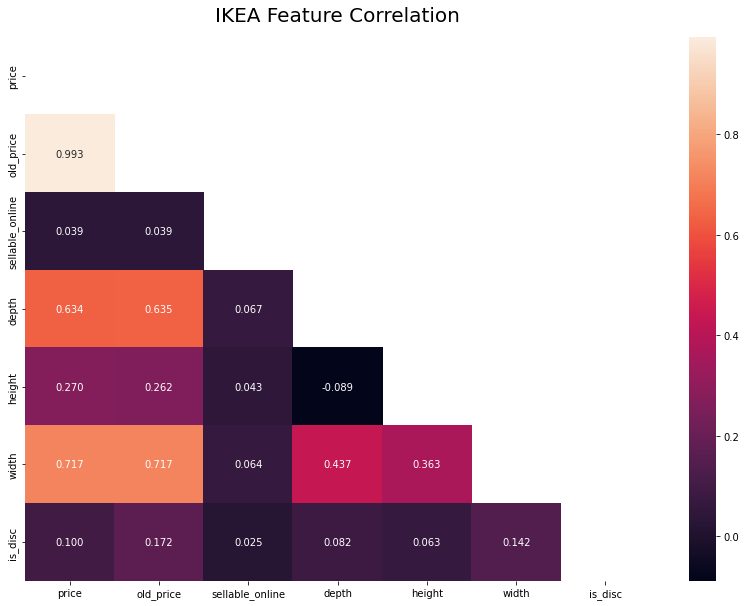

In [17]:
plt.figure(figsize=(14,10))
# Pearson Correlation
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))
ikea_corr = sns.heatmap(df_ikea.corr(), annot = True, fmt = '.3f', mask = np.triu(np.ones_like(df_ikea.corr(), dtype = np.bool)))
ikea_corr.set_title('IKEA Feature Correlation',fontdict={'fontsize':20}, pad=16)
plt.show()

From correlation plot above, it can be seen that:

- Since `old_price` is actually `price` before discount, so we can assume that this is a duplicated feature. Therefore these 2 features are highly correlated with each other.
- We want to take a look for independent features which are highly correlated with each other, the threshold is **0.700**.

In [18]:
# Find highly correlated features
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
cor_features = correlation(df_ikea, 0.7)
# N-Selected Features
print(f'N-Selected Features: {len(set(cor_features))}')
# Features Name
print(*cor_features, sep = ', ')

N-Selected Features: 2
width, old_price


In [20]:
df_ikea =  df_ikea.drop(columns=['old_price'])

In [21]:
df_ikea

,category,price,sellable_online,other_colors,depth,height,width,is_disc
0,Bar furniture,265.0,True,No,NaN,99.0,51.0,0
1,Bar furniture,995.0,False,No,NaN,105.0,80.0,0
2,Bar furniture,2095.0,False,No,NaN,NaN,NaN,0
3,Bar furniture,69.0,True,Yes,50.0,100.0,60.0,0
4,Bar furniture,225.0,True,No,60.0,43.0,74.0,0
...,...,...,...,...,...,...,...,...
3299,Wardrobes,750.0,True,No,50.0,NaN,91.0,1
3300,Wardrobes,1572.0,True,No,50.0,NaN,135.0,1
3301,Wardrobes,924.0,True,No,50.0,NaN,175.0,1
3302,Wardrobes,2745.0,True,No,50.0,NaN,178.0,1


## Handling Missing Values

In [22]:
# Automatic Imputation
numeric = df_ikea.select_dtypes(include=['float64','int64']).columns.tolist()

for column in df_ikea:
  if df_ikea[column].isnull().any():
    if(column in numeric):
      df_ikea[column]=df_ikea[column].fillna(df_ikea[column].median())

In [23]:
df_ikea.isnull().sum() # no missing value

category           0
price              0
sellable_online    0
other_colors       0
depth              0
height             0
width              0
is_disc            0
dtype: int64

In [24]:
df_ikea.sample(5)

,category,price,sellable_online,other_colors,depth,height,width,is_disc
1453,Chests of drawers & drawer units,295.0,True,No,49.0,70.0,46.0,0
569,Bookcases & shelving units,625.0,True,Yes,37.0,134.0,81.0,0
2048,Sofas & armchairs,3190.0,True,Yes,164.0,104.0,258.0,0
173,Beds,1991.0,True,Yes,78.0,69.0,212.0,1
1934,Outdoor furniture,3564.0,True,No,82.0,88.0,144.0,0


## Outlier Analysis

From previous information about basic statistical description for numerical features, it can be seen that `price` and `height` contain extreme value which its mean value are greater than median value and also the max value is far greater than the 75% percentile value. Hence we need to take a look even further about these features.

In [25]:
df_ikea.sort_values(by='height', ascending = False)

,category,price,sellable_online,other_colors,depth,height,width,is_disc
2609,Tables & desks,100.0,True,No,47.0,700.0,80.0,0
3280,Wardrobes,1785.5,True,No,42.0,321.0,80.0,1
806,Cabinets & cupboards,1268.0,True,No,42.0,301.0,80.0,1
3182,Wardrobes,3493.0,True,No,61.0,281.0,240.0,1
3218,Wardrobes,2800.0,True,No,57.0,271.0,300.0,1
...,...,...,...,...,...,...,...,...
590,Bookcases & shelving units,45.0,True,No,30.0,3.0,83.0,0
140,Beds,1285.0,True,Yes,47.0,2.0,83.0,0
199,Beds,300.0,True,No,88.0,2.0,200.0,1
93,Beds,695.0,True,No,47.0,2.0,83.0,0


There are extreme-high and extreme-min `height` values in this data. It can be seen from dataframe above where **Tables and desks** has height 700 cm which is make no sense while example from extreme-min was 1 cm. We might want to fix this with IQR method.  

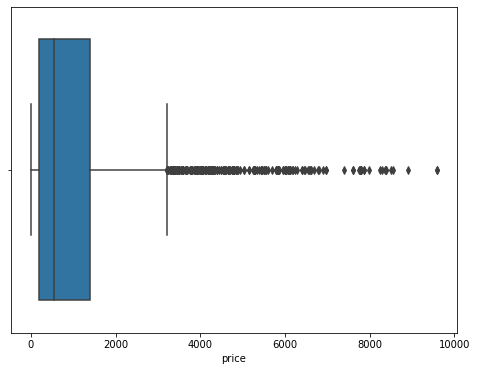

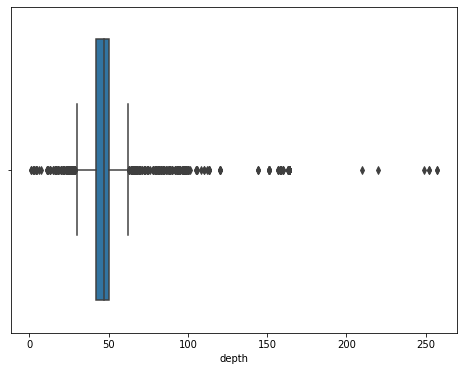

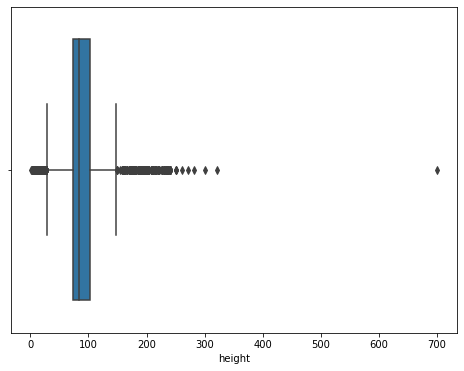

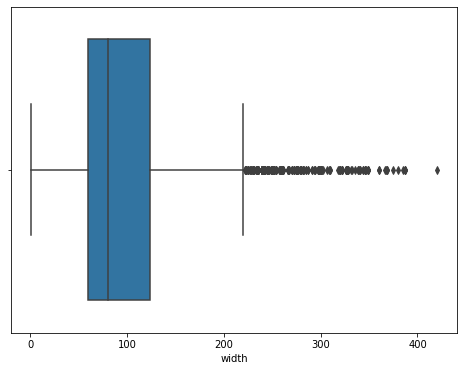

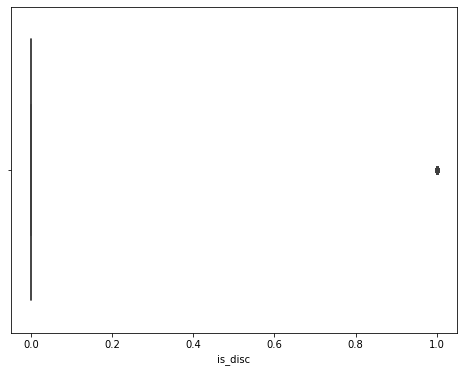

In [26]:
# Automaticated boxplot for numerical features
for i in numeric:
  plt.figure(figsize=(8,6))
  sns.boxplot(df_ikea[i])

In [27]:
#Create boundary for height
df_ikea = df_ikea[df_ikea['height']<700]
df_ikea

,category,price,sellable_online,other_colors,depth,height,width,is_disc
0,Bar furniture,265.0,True,No,47.0,99.0,51.0,0
1,Bar furniture,995.0,False,No,47.0,105.0,80.0,0
2,Bar furniture,2095.0,False,No,47.0,83.0,80.0,0
3,Bar furniture,69.0,True,Yes,50.0,100.0,60.0,0
4,Bar furniture,225.0,True,No,60.0,43.0,74.0,0
...,...,...,...,...,...,...,...,...
3299,Wardrobes,750.0,True,No,50.0,83.0,91.0,1
3300,Wardrobes,1572.0,True,No,50.0,83.0,135.0,1
3301,Wardrobes,924.0,True,No,50.0,83.0,175.0,1
3302,Wardrobes,2745.0,True,No,50.0,83.0,178.0,1


# **Exploratory Data Analysis**

In [29]:
# To get rid of all plot frame
import matplotlib as mpl

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

## Univariate Analysis

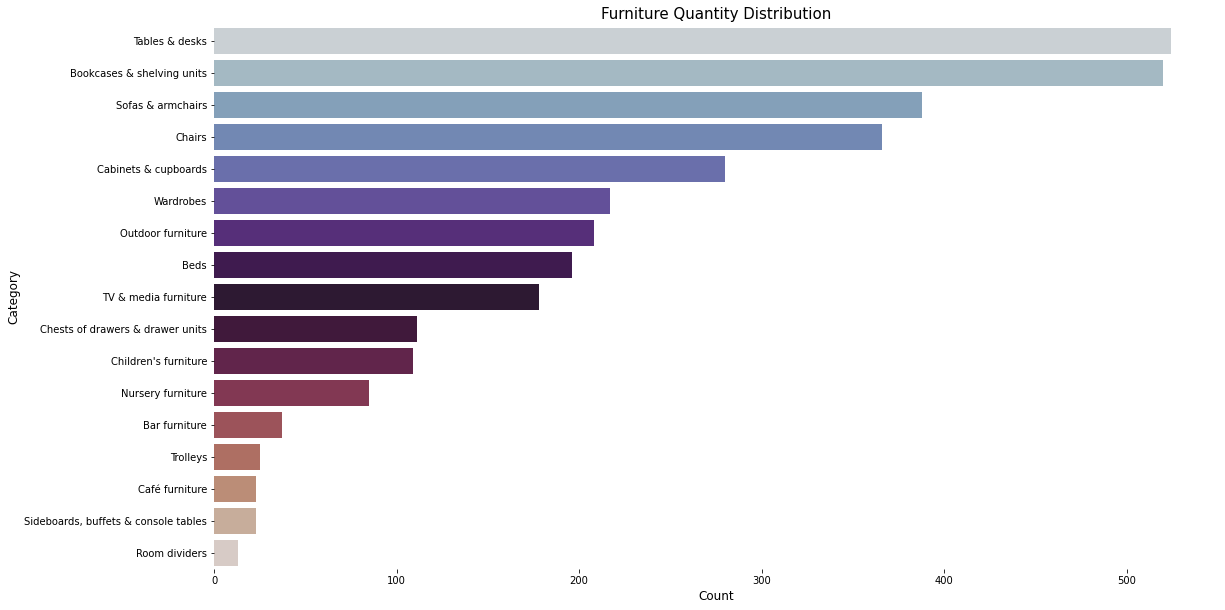

In [30]:
# Furniture quantity
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

plt.figure(figsize=(18,10))
cat_order = df_ikea['category'].value_counts().index
ax = sns.countplot(data = df_ikea, y = 'category', order = cat_order, palette = 'twilight')
plt.ylabel('Category', size = 12)
plt.xlabel('Count', size = 12)
plt.title('Furniture Quantity Distribution', size = 15)
plt.show()

From plot above, it can be seen that:
- Tables and desks have the highest quantity among other furniture in IKEA Saudi which is interesting. Why it's not a bed or chair?
- Instead of Beds, IKEA in Saudi has more Bookcases & shelving units while we knew that Beds is our basic needs. Why is that?
- Most houses in Saudi are probably built with a free-room type of design because room dividers are the least item in Saudi IKEA's. Is it?

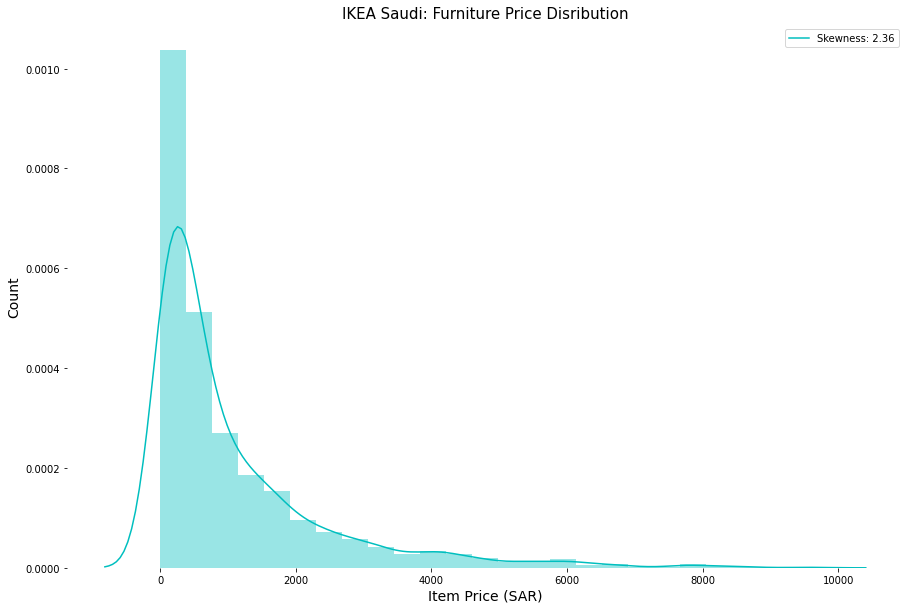

In [31]:
# Distribution of items price
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

plt.figure(figsize=(15,10))
price_plot = sns.distplot(df_ikea['price'], bins = 25, kde = True, color = 'c')
plt.title('IKEA Saudi: Furniture Price Disribution', size = 15)
price_plot.legend(['Skewness: {:.2f}'.format(df_ikea['price'].skew())])
price_plot
price_plot.set_ylabel('Count', fontsize = 14)
price_plot.set_xlabel('Item Price (SAR)', fontsize = 14)
plt.show()

From the distribution plot above, it can be seen that `price` distribution has right-skewed.

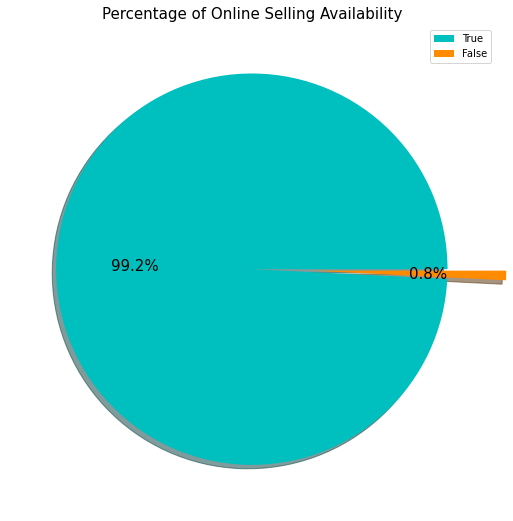

In [ ]:
# Piechart whether the item sellable online or not
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

plt.figure(figsize=(9,9))
plt.pie(df_ikea['sellable_online'].value_counts(), explode = [0,0.3], autopct='%1.1f%%',
        colors = ['c','darkorange'], textprops={'fontsize':15}, shadow = True)
plt.legend(df_ikea['sellable_online'].unique())
plt.title('Percentage of Online Selling Availability', size = 15)
plt.show()

From the pie chart above, most of the furniture in Saudi IKEA is sellable online. This quite makes sense because nowadays online shopping is one of the most used selling methods for almost every seller.

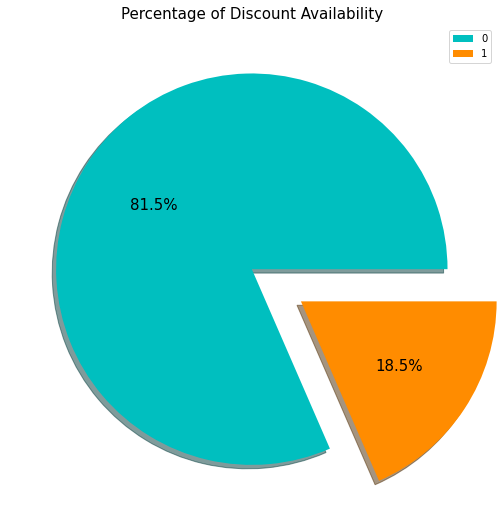

In [ ]:
# Pie chart whether the item discounted or not
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

plt.figure(figsize=(9,9))
plt.pie(df_ikea['is_disc'].value_counts(), explode = [0,0.3], autopct='%1.1f%%',
        colors = ['c','darkorange'], textprops={'fontsize':15}, shadow = True)
plt.legend(df_ikea['is_disc'].unique())
plt.title('Percentage of Discount Availability', size = 15)
plt.show()

From the pie chart above, most of the furniture in Saudi IKEA is not discounted. 0 means there is no discount available for the item and 1 means there is a discount available for the item.

## Bivariate Analysis

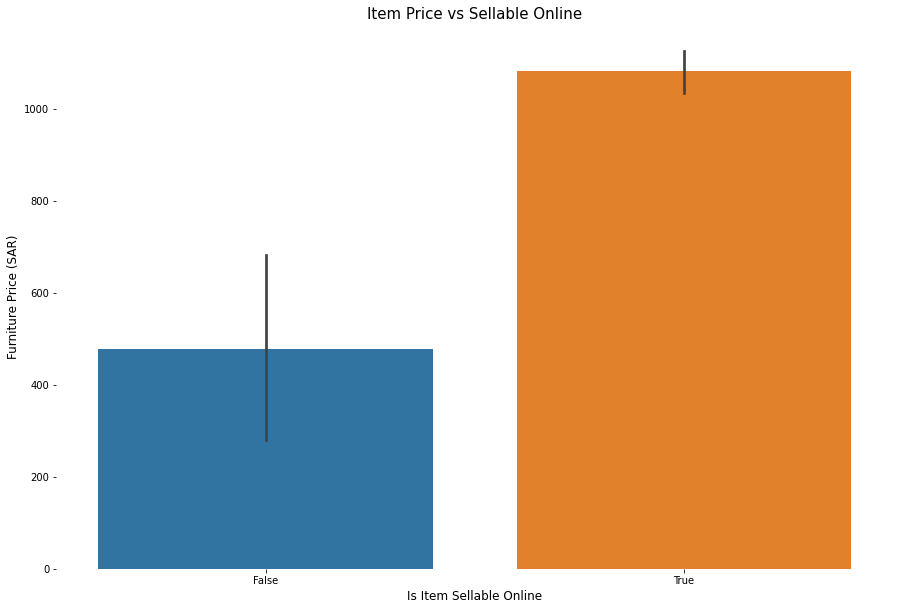

In [32]:
# Item price vs availability of online selling
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

plt.figure(figsize=(15,10))
so_barplot = sns.barplot(data = df_ikea, x = 'sellable_online', y = 'price')
so_barplot.set_title('Item Price vs Sellable Online', size = 15)
so_barplot.set_ylabel('Furniture Price (SAR)', size = 12)
so_barplot.set_xlabel('Is Item Sellable Online', size = 12)
plt.show()

Furniture which is available for online selling has a higher price tag than not available for online selling. This might be because the furniture is more exclusive so the selling price is higher.

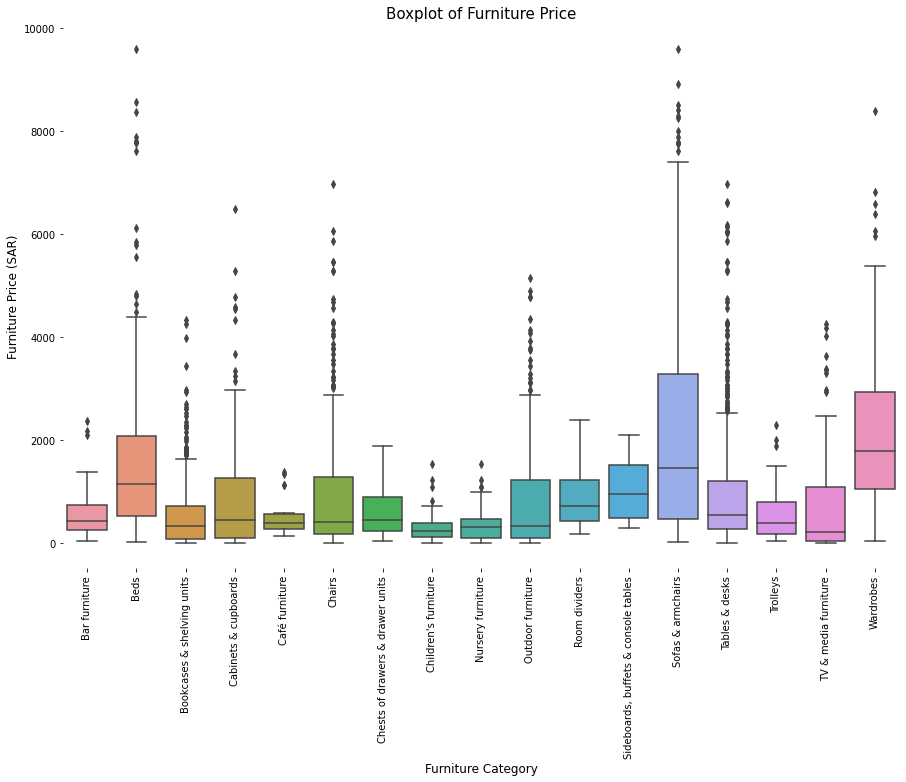

In [33]:
# Item price vs category
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

plt.figure(figsize=(15,10))
price_box = sns.boxplot(data = df_ikea, x = 'category', y = 'price')
price_box.set_title('Boxplot of Furniture Price', size = 15)
price_box.set_ylabel('Furniture Price (SAR)', size = 12)
price_box.set_xlabel('Furniture Category', size = 12)
plt.setp(price_box.get_xticklabels(), rotation=90)
plt.show()

According to boxplot above, it can be seen that:
- Beds and Sofas armchairs price are quite ranging from its minimum price with maximum price
- Electronic item such as TV & media furniture price is somehow has low price distribution compared to several furniture such as tables and desk or chairs

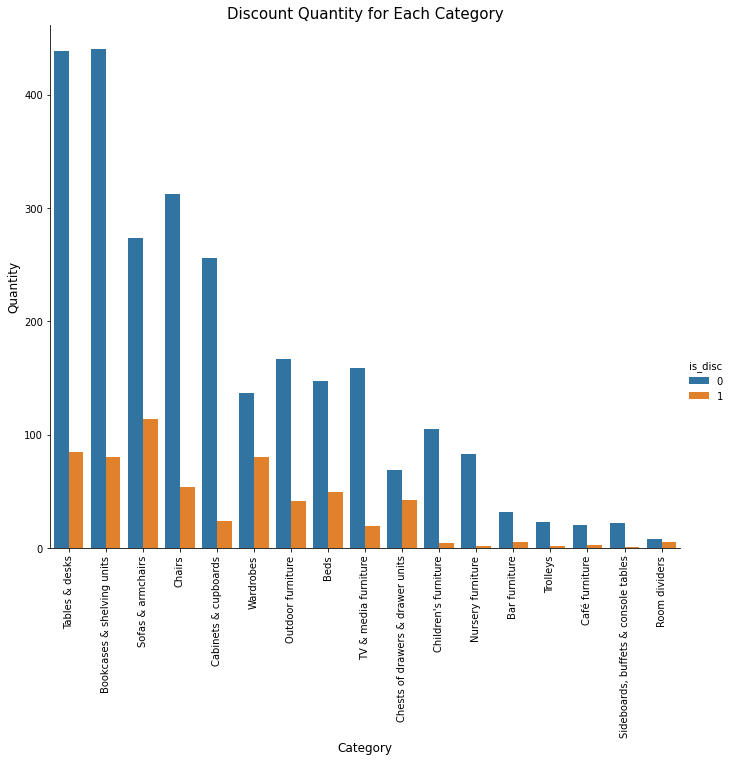

In [34]:
# Furniture category vs discount available or no
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

sns.catplot(data = df_ikea, x = 'category', hue = 'is_disc', kind = 'count',
            order = df_ikea['category'].value_counts().index, height = 8, aspect = 12/10)
plt.xticks(rotation=90)
plt.title('Discount Quantity for Each Category', size = 15)
plt.ylabel('Quantity', size = 12)
plt.xlabel('Category', size = 12)
plt.show()

According to the plot above, there are more items with no discount rather than items with discount. this might be caused by all of the furniture is new released.  The most discounted furniture is **Sofas and armchairs** category.

## Multivariate Analysis

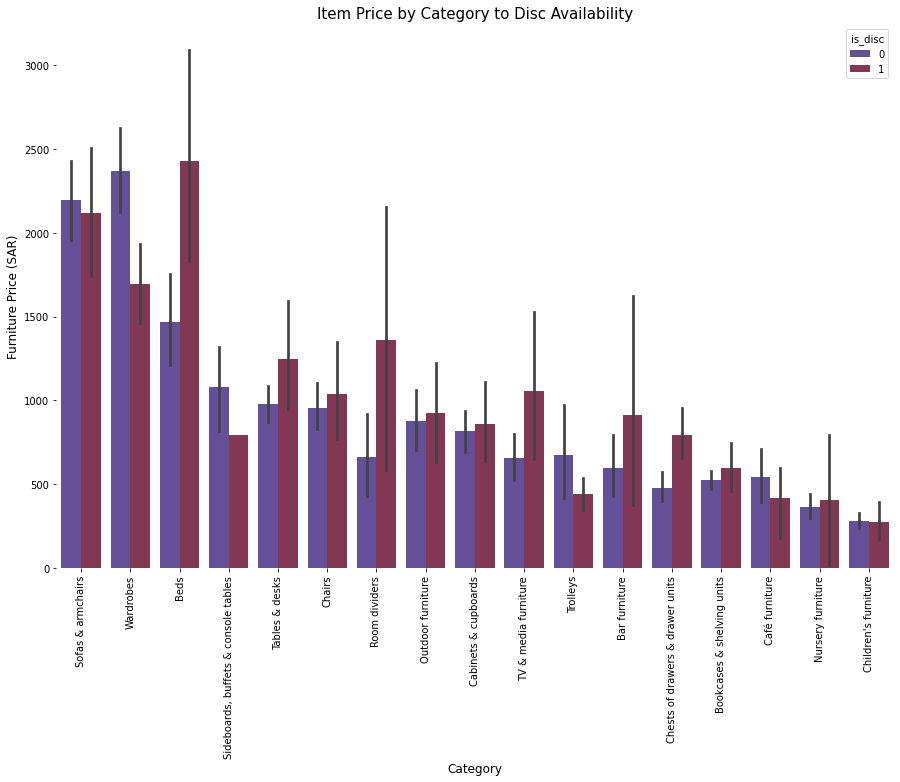

In [35]:
# Item price by category to disc availability
display(HTML("""
<style>
#output-body {
    display: flex;
    align-items: center;
    justify-content: center;
}
</style>
"""))

ma_order = df_ikea.groupby(['category'])['price'].aggregate(np.mean).reset_index().sort_values('price', ascending = False)
plt.figure(figsize=(15,10))
sns.barplot(data = df_ikea, x = 'category', y ='price', hue = 'is_disc',
            order = ma_order['category'], palette = 'twilight')
plt.xticks(rotation=90)
plt.title('Item Price by Category to Disc Availability', size = 15)
plt.ylabel('Furniture Price (SAR)', size = 12)
plt.xlabel('Category', size = 12)
plt.legend
plt.show()

# **Feature Engineering**

In [ ]:
df_ikea

,category,price,sellable_online,other_colors,depth,height,width,is_disc
0,Bar furniture,265.0,True,No,47.0,99.0,51.0,0
1,Bar furniture,995.0,False,No,47.0,105.0,80.0,0
2,Bar furniture,2095.0,False,No,47.0,83.0,80.0,0
3,Bar furniture,69.0,True,Yes,50.0,100.0,60.0,0
4,Bar furniture,225.0,True,No,60.0,43.0,74.0,0
...,...,...,...,...,...,...,...,...
3299,Wardrobes,750.0,True,No,50.0,83.0,91.0,1
3300,Wardrobes,1572.0,True,No,50.0,83.0,135.0,1
3301,Wardrobes,924.0,True,No,50.0,83.0,175.0,1
3302,Wardrobes,2745.0,True,No,50.0,83.0,178.0,1


In [ ]:
# feature encoding
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()
var_mod = ['category', 'sellable_online', 'other_colors']

for i in var_mod:
  df_ikea[i] = le.fit_transform(df_ikea[i])

In [ ]:
df_ikea

,category,price,sellable_online,other_colors,depth,height,width,is_disc
0,0,265.0,1,0,47.0,99.0,51.0,0
1,0,995.0,0,0,47.0,105.0,80.0,0
2,0,2095.0,0,0,47.0,83.0,80.0,0
3,0,69.0,1,1,50.0,100.0,60.0,0
4,0,225.0,1,0,60.0,43.0,74.0,0
...,...,...,...,...,...,...,...,...
3299,16,750.0,1,0,50.0,83.0,91.0,1
3300,16,1572.0,1,0,50.0,83.0,135.0,1
3301,16,924.0,1,0,50.0,83.0,175.0,1
3302,16,2745.0,1,0,50.0,83.0,178.0,1


In [ ]:
# feature scalling
scalling = MinMaxScaler()
df_ikea[['price','depth','height','width']] = scalling.fit_transform(df_ikea[['price','depth','height','width']])

In [ ]:
df_ikea

,category,price,sellable_online,other_colors,depth,height,width,is_disc
0,0,0.027343,1,0,0.179688,0.306250,0.119332,0
1,0,0.103527,0,0,0.179688,0.325000,0.188544,0
2,0,0.218326,0,0,0.179688,0.256250,0.188544,0
3,0,0.006888,1,1,0.191406,0.309375,0.140811,0
4,0,0.023168,1,0,0.230469,0.131250,0.174224,0
...,...,...,...,...,...,...,...,...
3299,16,0.077959,1,0,0.191406,0.256250,0.214797,1
3300,16,0.163745,1,0,0.191406,0.256250,0.319809,1
3301,16,0.096118,1,0,0.191406,0.256250,0.415274,1
3302,16,0.286162,1,0,0.191406,0.256250,0.422434,1


# **Data Modelling**

## Initial Preprocessing

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

# model metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

# machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRFRegressor
from sklearn.linear_model import Ridge

In [ ]:
# split dataset

# independent variable
x = df_ikea.drop(columns=['price'])

# dependent variable
y = df_ikea['price']

In [ ]:
# split train and testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)

In [ ]:
# data train and test dimention
print(f'X Train Dimention: {x_train.shape[0:2]}')
print(f'Y Train Dimention: {y_train.shape[0]}')
print(f'X Test Dimention: {x_test.shape[0:2]}')
print(f'Y Test Dimention: {y_test.shape[0]}')

X Train Dimention: (2642, 7)
Y Train Dimention: 2642
X Test Dimention: (661, 7)
Y Test Dimention: 661


In [ ]:
# cross validation score
def cross_val(model_name, model, x, y, cv):
  scores = CVS(model, x, y, cv = cv)
  print(f'{model_name} Scores:')
  for i in scores:
    print(round(i,2))
  print(f'Average {model_name} Score: {round(scores.mean(),4)}')

## 1). Multiple Linear Regressor

In [ ]:
# ml model
mlr_reg = LinearRegression()

# model fit
mlr_reg.fit(x_train, y_train)

# model predict
y_pred = mlr_reg.predict(x_test)

# model score
mlr_MAE = round(MAE(y_test, y_pred),2)
mlr_MSE = round(MSE(y_test, y_pred),2)
mlr_r2 = round(R2(y_test, y_pred),4)
mlr_cvs = round(CVS(mlr_reg, x, y, cv = 5).mean(),4)

print(f'Mean Absolute Error: {mlr_MAE}\n')
print(f'Mean Squared Error: {mlr_MSE}\n')
print(f'R-Squared: {mlr_r2}\n')
cross_val(mlr_reg,LinearRegression(),x,y,5)

Mean Absolute Error: 0.06

Mean Squared Error: 0.01

R-Squared: 0.5741

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) Scores:
0.51
0.35
0.27
0.71
0.28
Average LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) Score: 0.4221


## 2). Random Forest Regressor

In [ ]:
# ml model
rf_reg = RandomForestRegressor(n_estimators=300, max_depth=5, min_samples_leaf=150, n_jobs=5, random_state=123)

# model fit
rf_reg.fit(x_train, y_train)

# model predict
y_pred = rf_reg.predict(x_test)

# model score
rf_MAE = round(MAE(y_test, y_pred),2)
rf_MSE = round(MSE(y_test, y_pred),2)
rf_r2 = round(R2(y_test, y_pred),4)
rf_cvs = round(CVS(rf_reg, x, y, cv = 5).mean(),4)

print(f'Mean Absolute Error: {rf_MAE}\n')
print(f'Mean Squared Error: {rf_MSE}\n')
print(f'R-Squared: {rf_r2}\n')
cross_val(rf_reg,RandomForestRegressor(),x,y,5)

Mean Absolute Error: 0.07

Mean Squared Error: 0.01

R-Squared: 0.5026

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=150,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=5, oob_score=False,
                      random_state=123, verbose=0, warm_start=False) Scores:
0.62
0.57
0.44
0.69
0.28
Average RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=150,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300,

## 3). XGBoost Regressor

In [ ]:
# ml model
xgb_reg = XGBRFRegressor()

# model fit
xgb_reg.fit(x_train, y_train)

# model predict
y_pred = xgb_reg.predict(x_test)

# model score
xgb_MAE = round(MAE(y_test, y_pred),2)
xgb_MSE = round(MSE(y_test, y_pred),2)
xgb_r2 = round(R2(y_test, y_pred),4)
xgb_cvs = round(CVS(xgb_reg, x, y, cv = 5).mean(),4)

print(f'Mean Absolute Error: {xgb_MAE}\n')
print(f'Mean Squared Error: {xgb_MSE}\n')
print(f'R-Squared: {xgb_r2}\n')
cross_val(xgb_reg,XGBRFRegressor(),x,y,5)

[10:53:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:53:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:53:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:53:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:53:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:53:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error: 0.06

Mean Squared Error: 0.01

R-Squared: 0.6203

[10:53:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:53:14] WARNING: /workspace/src/obje

## 4). Lasso Regressor

In [ ]:
# ml model
lasso_reg = Lasso(alpha = .005)

# model fit
lasso_reg.fit(x_train, y_train)

# model predict
y_pred = lasso_reg.predict(x_test)

# model score
lasso_MAE = round(MAE(y_test, y_pred),2)
lasso_MSE = round(MSE(y_test, y_pred),2)
lasso_r2 = round(R2(y_test, y_pred),4)
lasso_cvs = round(CVS(lasso_reg, x, y, cv = 5).mean(),4)

print(f'Mean Absolute Error: {lasso_MAE}\n')
print(f'Mean Squared Error: {lasso_MSE}\n')
print(f'R-Squared: {lasso_r2}\n')
cross_val(lasso_reg,Lasso(alpha=.005),x,y,5)

Mean Absolute Error: 0.07

Mean Squared Error: 0.01

R-Squared: 0.4733

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) Scores:
0.42
0.34
0.27
0.38
0.27
Average Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) Score: 0.3359


## 5). Ridge Regressor

In [ ]:
# ml model
rd_reg = Ridge(normalize=True)

# model fit
rd_reg.fit(x_train, y_train)

# model predict
y_pred = rd_reg.predict(x_test)

# model score
rd_MAE = round(MAE(y_test, y_pred),2)
rd_MSE = round(MSE(y_test, y_pred),2)
rd_r2 = round(R2(y_test, y_pred),4)
rd_cvs = round(CVS(rd_reg, x, y, cv = 5).mean(),4)

print(f'Mean Absolute Error: {rd_MAE}\n')
print(f'Mean Squared Error: {rd_MSE}\n')
print(f'R-Squared: {rd_r2}\n')
cross_val(rd_reg,Ridge(normalize=True),x,y,5)

Mean Absolute Error: 0.07

Mean Squared Error: 0.01

R-Squared: 0.4893

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001) Scores:
0.44
0.33
0.25
0.51
0.24
Average Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001) Score: 0.3532


# **Conclusion**

## Model Metrics

In [ ]:
MAE = [mlr_MAE,rf_MAE,xgb_MAE,lasso_MAE,rd_MAE]
MSE = [mlr_MSE,rf_MSE,xgb_MSE,lasso_MSE,rd_MSE]
R2 = [mlr_r2,rf_r2,xgb_r2,lasso_r2,rd_r2]
cross_score = [mlr_cvs,rf_cvs,xgb_cvs,lasso_cvs,rd_cvs]

Rate = pd.DataFrame({'Models':['Multiple Linear Regression','Random Forest Regressor','XGBoost Regressor','Lasso Regressor','Ridge Regressor'],
                     'MAE':MAE, 'MSE':MSE, 'R-Squared':R2, 'Cross Validation Score': cross_score})
Rate.sort_values(by='R-Squared', ascending = False)

,Models,MAE,MSE,R-Squared,Cross Validation Score
2,XGBoost Regressor,0.06,0.01,0.6203,0.4105
0,Multiple Linear Regression,0.06,0.01,0.5741,0.4221
1,Random Forest Regressor,0.07,0.01,0.5026,0.3248
4,Ridge Regressor,0.07,0.01,0.4893,0.3532
3,Lasso Regressor,0.07,0.01,0.4733,0.3359


## Insights and Recommendations

Insights and recommendations for **Data Analyst** or **Data Scientist**:
- The average R-Squared for all models is relatively good. Several models pass **0.500** on the R-Squared score. **R-Squared** itself is a statistical measure that represents the propotion of the variance for dependent variable that's explained by independent variable or variable in regression model.
- Based on models rate, **XGBoost Regressor** and **Multiple Linear Regression** are the best performing models, yet we might want to discover even further for a top-1 model for the data. As for now, we can use **XGBoost Regressor** to predict the upcoming furniture price.
- For better performance, we might need to tune the parameter after selecting the suitable model.

Insights and recommendations for **Stakeholder** and **Marketing Strategy**:
- Based on visualization in **Exploratory Data Analysis**, **tables and desks** has the highest quantity in our warehouse, and **room divider** is the least one. We might want to reduce the **room and divider** product since most houses in Saudi are built with a free-room type of architecture. We can save the production money on another furniture.
- As **tables and desks** have the highest quantity, we might want to create a promotion for this item to upscale our profit.
- As for discount, we might want to focus on the least and middle quantity product. Because customers tend to buy an item if there's a discount, despite they really need the item or not. For example, we might want to give a discount to **Beds** or **Chairs**.